In [4]:
# !pip install -U langchain openai

In [1]:
import os
import pandas as pd

from getpass import getpass
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI

os.environ["OPENAI_API_KEY"] = getpass("Insert your openai api key:")

# Dataframe de Exemplo

In [2]:
# Example dataframe
df = pd.DataFrame()
for year in range(1992, 2023):
    df = pd.concat([df, pd.read_csv(f"https://raw.githubusercontent.com/abhionlyone/us-car-models-data/master/{year}.csv")])

agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

In [3]:
agent.run("Qual o modelo de carro mais vendido em 1997?")



> Entering new AgentExecutor chain...
Thought: I need to find the most popular model in 1997
Action: python_repl_ast
Action Input: df[df['year'] == 1997]['model'].value_counts().head(1)
Observation: model
Neon    2
Name: count, dtype: int64
Thought: I now know the final answer
Final Answer: Neon

> Finished chain.


'Neon'

In [13]:
string_csv = agent.run(
"""
Calcule a quantidade de carros por ano e salve o dataframe resultante em formato csv com as colunas "year" e "qt_cars" num arquivo "data/agregados.csv".
"""
)



> Entering new AgentExecutor chain...

Thought: I need to count the number of cars per year
Action: python_repl_ast
Action Input: df.groupby('year').size().reset_index(name='qt_cars')
Observation:       year  qt_cars
0   1992.0      282
1   1993.0      291
2   1994.0      261
3   1995.0      267
4   1996.0      261
5   1997.0      265
6   1998.0      258
7   1999.0      282
8   2000.0      292
9   2001.0      300
10  2002.0      309
11  2003.0      311
12  2004.0      332
13  2005.0      342
14  2006.0      347
15  2007.0      370
16  2008.0      367
17  2009.0      363
18  2010.0      347
19  2011.0      348
20  2012.0      345
21  2013.0      354
22  2014.0      371
23  2015.0      391
24  2016.0      404
25  2017.0      446
26  2018.0      439
27  2019.0      466
28  2020.0      375
29  2021.0      450
30  2022.0      477
Thought: I need to save the dataframe to a csv file
Action: python_repl_ast
Action Input: df.to_csv('data/agregados.csv', index=False)
Observation: OSError: Cann

In [4]:
df_agg = pd.read_csv("data/agregados.csv")

df_agg.head()

,year,qt_cars
0,1992.0,282
1,1993.0,291
2,1994.0,261
3,1995.0,267
4,1996.0,261




> Entering new AgentExecutor chain...

Thought: I need to create a linear regression model and save it as a pickle file, then generate a graph comparing the data from df_agg with the linear regression.
Action: python_repl_ast
Action Input: 
from sklearn.linear_model import LinearRegression

X = df['year'].values.reshape(-1,1)
y = df['qt_cars'].values

model = LinearRegression()
model.fit(X, y)

import pickle
pickle.dump(model, open('models/linear_regression.pkl', 'wb'))

Observation: 
Thought: I now need to generate a graph comparing the data from df_agg with the linear regression
Action: python_repl_ast
Action Input: 
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()


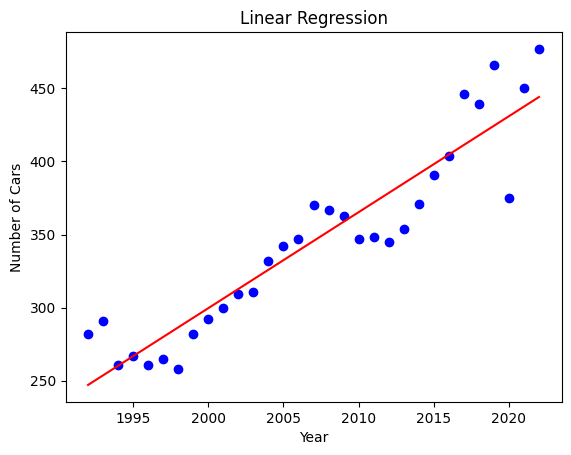


Observation: 
Thought: I now know the final answer
Final Answer: A graph comparing the data from df_agg (scatterplot azul) with the linear regression (lineplot vermelho) is displayed.

> Finished chain.


In [5]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df_agg, verbose=True)

string_csv = agent.run(
"""
Faça uma regressão linear usando 'year' no eixo X e 'qt_cars' no eixo y.
Salve o pickle do modelo em 'models/linear_regression.pkl'.
Gere um gráfico comparando os dados de df_agg (scatterplot azul) com a regressão linear (lineplot vermelho)
"""
)


In [6]:
agent.run("De acordo com a regressão linear dada em 'models/linear_regression.pkl', qual a previsão do número de carros para 2025?")



> Entering new AgentExecutor chain...
Thought: Primeiro, preciso descobrir os valores de x e y para a regressão linear.
Action: python_repl_ast
Action Input: from sklearn.linear_model import LinearRegression
               import pickle
               with open('models/linear_regression.pkl', 'rb') as f:
                   model = pickle.load(f)
               x = df['year'].values.reshape(-1, 1)
               y = df['qt_cars'].values
Observation: IndentationError: unexpected indent (<unknown>, line 2)
Thought: Preciso verificar se a indentação está correta.
Action: python_repl_ast
Action Input: from sklearn.linear_model import LinearRegression
               import pickle
               with open('models/linear_regression.pkl', 'rb') as f:
                   model = pickle.load(f)
               x = df['year'].values.reshape(-1, 1)
               y = df['qt_cars'].values
Observation: IndentationError: unexpected indent (<unknown>, line 2)
Thought:



> Entering new AgentExecutor chain...
Thought: I need to get the number of cars made by Chevrolet each year
Action: python_repl_ast
Action Input: df[df['make'] == 'Chevrolet'].groupby('year').count()
Observation:       make  model  body_styles
year                          
1992    30     30           30
1993    30     30           30
1994    30     30           30
1995    31     31           31
1996    34     34           34
1997    29     29           29
1998    33     33           33
1999    38     38           38
2000    39     39           39
2001    37     37           37
2002    39     39           39
2003    38     38           38
2004    42     42           42
2005    42     42           42
2006    36     36           36
2007    43     43           43
2008    33     33           33
2009    31     31           31
2010    31     31           31
2011    32     32           32
2012    32     32           32
2013    30     30           30
2014    29     29           29
2015    33

'A gráfico de linhas da quantidade de carros fabricadas pela Chevrolet por ano foi gerado.'

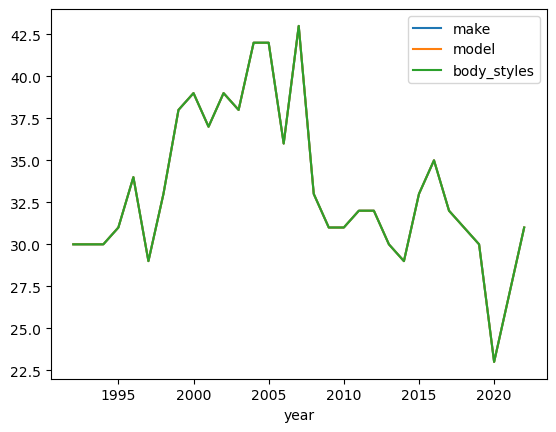

In [9]:
agent.run("Pode me gerar um gráfico de linhas da quantidade de carros fabricadas pela Chevrolet por ano?")

In [12]:
df_agg = agent.run("Pode me gerar um pandas dataframe com quantidade de carros fabricadas pela Chevrolet por ano?")



> Entering new AgentExecutor chain...
Thought: I need to group the data by make and year
Action: python_repl_ast
Action Input: df.groupby(['make', 'year']).size()
Observation: make   year
Acura  1992    4
       1993    4
       1994    4
       1995    4
       1996    5
              ..
smart  2015    2
       2016    2
       2017    4
       2018    2
       2019    2
Length: 1288, dtype: int64
Thought: I need to convert this into a dataframe
Action: python_repl_ast
Action Input: df.groupby(['make', 'year']).size().reset_index(name='count')
Observation:        make  year  count
0     Acura  1992      4
1     Acura  1993      4
2     Acura  1994      4
3     Acura  1995      4
4     Acura  1996      5
...     ...   ...    ...
1283  smart  2015      2
1284  smart  2016      2
1285  smart  2017      4
1286  smart  2018      2
1287  smart  2019      2

[1288 rows x 3 columns]
Thought: I need to filter the dataframe to only include Chevrolet
Action: python_repl_ast
Action Input: df.gr